In [8]:
# import packages
import glob
from pathlib import Path
import os
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import calendar
import geopandas as gpd
# import cartopy
import matplotlib.pyplot as plt
import math
from pathos.threading import ThreadPool as Pool
from scipy.optimize import least_squares
import sklearn
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import random
from scipy.optimize import minimize
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [9]:
# define your script working directory
work_dir="/mnt/u/LSM root zone/global_sr/"

In [10]:
from f_catch_characteristics import *
from f_sr_calculation import *

In [11]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

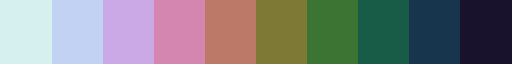

In [12]:
import matplotlib
cmap = cm.get_cmap('cubehelix_r', 12)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_rdbu = ListedColormap(color_list[1:-1])
cmap_rdbu.set_over(color_list[-1])
cmap_rdbu.set_under(color_list[0])
cmap_rdbu.set_bad('grey')
cmap_rdbu

In [13]:
# CAMELS
u = pd.read_csv(f'{work_dir}/output/us_attributes.csv',index_col=0)
u.columns

Index(['p_mean', 'pet_mean', 'p_seasonality', 'frac_snow', 'aridity',
       'high_prec_freq', 'high_prec_dur', 'high_prec_timing', 'low_prec_freq',
       'low_prec_dur', 'low_prec_timing', 'geol_1st_class',
       'glim_1st_class_frac', 'geol_2nd_class', 'glim_2nd_class_frac',
       'carbonate_rocks_frac', 'geol_porostiy', 'geol_permeability', 'q_mean',
       'runoff_ratio', 'slope_fdc', 'baseflow_index', 'stream_elas', 'q5',
       'q95', 'high_q_freq', 'high_q_dur', 'low_q_freq', 'low_q_dur',
       'zero_q_freq', 'hfd_mean', 'huc_02', 'gauge_name',
       'soil_depth_pelletier', 'soil_depth_statsgo', 'soil_porosity',
       'soil_conductivity', 'max_water_content', 'sand_frac', 'silt_frac',
       'clay_frac', 'water_frac', 'organic_frac', 'other_frac', 'gauge_lat',
       'gauge_lon', 'elev_mean', 'slope_mean', 'area_gages2',
       'area_geospa_fabric', 'frac_forest', 'lai_max', 'lai_diff', 'gvf_max',
       'gvf_diff', 'dom_land_cover_frac', 'dom_land_cover', 'root_depth_50',

Text(0.5, 1.0, 'CAMELS q mean mm/day')

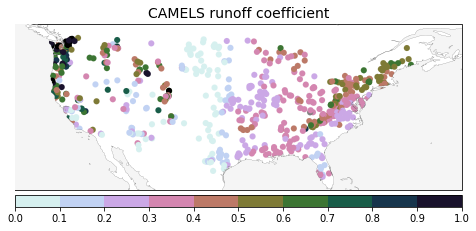

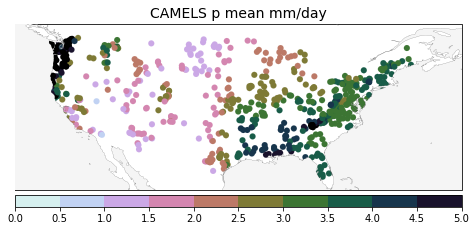

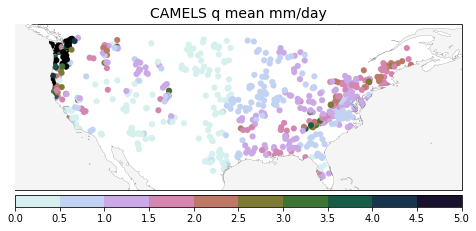

In [14]:
lat_min,lat_max= 25,51
lon_min,lon_max= -130,-60
    
cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,1,11)
bounds2 = np.linspace(0,1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(u.gauge_lon,u.gauge_lat,c=u['q_mean']/u['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='rc', size=10)
ax.set_title(f'CAMELS runoff coefficient',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(u.gauge_lon,u.gauge_lat,c=u['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='p', size=10)
ax.set_title(f'CAMELS p mean mm/day',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(u.gauge_lon,u.gauge_lat,c=u['q_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='q', size=10)
ax.set_title(f'CAMELS q mean mm/day',size=14)

Text(0.5, 1.0, 'GSIM q mean mm/day')

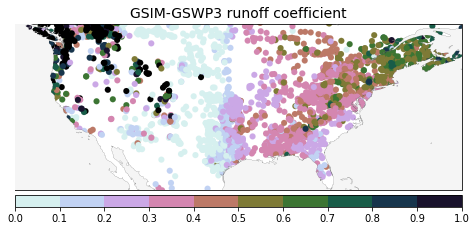

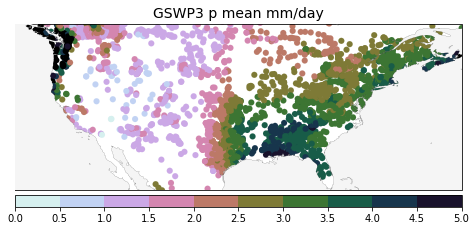

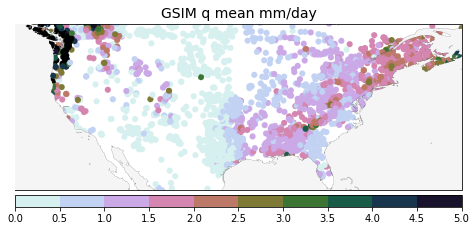

In [15]:
data_sources1 = 'gswp-p_gleam-ep_gswp-t' 
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources1}.csv',index_col=0)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,1,11)
bounds2 = np.linspace(0,1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean']/df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='rc', size=10)
ax.set_title(f'GSIM-GSWP3 runoff coefficient',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='p', size=10)
ax.set_title(f'GSWP3 p mean mm/day',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='q', size=10)
ax.set_title(f'GSIM q mean mm/day',size=14)

In [16]:
df

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,pcarb,bulk,stext,fc_mean,lai_mean,lai_rsd,fc_rsd,sc_mean,sc_rsd,sr_20
dk_0000028,2.631293,1.229027,1.114571,8.773003,0.467081,0.553687,21.563266,17.812865,3.88,22.00,...,7.659998,138.461616,SaLo,0.451405,1.586040,0.687663,0.532243,11.750000,1.371399,133.292186
ca_0002351,1.590253,1.401269,0.455940,0.643260,0.881161,0.419085,32.852726,25.221876,5.05,22.43,...,4.124604,134.041930,SiLo,0.262270,0.950806,0.641162,0.572026,41.416667,0.833385,86.691569
sk_0000020,2.165294,1.502689,1.264748,7.088855,0.693988,0.606613,27.000000,22.909999,4.84,27.20,...,4.058543,133.473521,SiLo,0.483512,2.201027,0.766177,0.635485,21.333333,1.454613,NaN
br_0001524,4.594565,2.985874,1.390253,19.671313,0.649871,0.691181,10.875286,7.688446,3.35,18.23,...,3.079075,115.424594,SiCl,0.630020,2.691411,0.227173,0.168511,0.000000,0.000000,162.630938
cz_0000019,2.285853,1.484881,0.972639,7.528472,0.649596,0.593821,28.280451,22.165638,3.81,20.90,...,4.066768,131.418163,SiLo,0.446682,1.885474,0.753561,0.597933,25.416667,1.311083,51.681945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITTRE245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.971187,122.442418,SiLo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITTRE263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.759339,126.485089,SiLo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITTOS334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.012723,136.895278,SiClLo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITUMB284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.563234,139.911846,SiClLo,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'GSIM q mean mm/day')

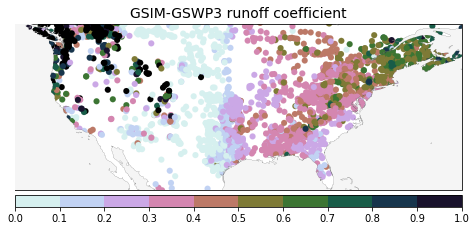

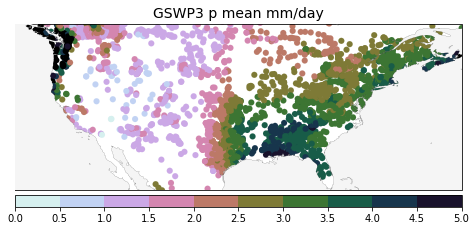

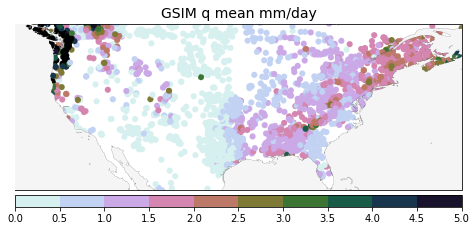

In [17]:
data_sources1 = 'gswp-p_gleam-ep_gswp-t' 
df1 = pd.read_csv(f'{work_dir}/output/catchment_characteristics/climate_characteristics_{data_sources1}.csv',index_col=0)
df2 = pd.read_csv(f'{work_dir}/output/catchment_characteristics/landscape_characteristics_{data_sources1}.csv',index_col=0)
df = pd.concat([df1,df2],axis=1)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,1,11)
bounds2 = np.linspace(0,1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean']/df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='rc', size=10)
ax.set_title(f'GSIM-GSWP3 runoff coefficient',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='p', size=10)
ax.set_title(f'GSWP3 p mean mm/day',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='q', size=10)
ax.set_title(f'GSIM q mean mm/day',size=14)

Text(0.5, 1.0, 'GSIM q mean mm/day')

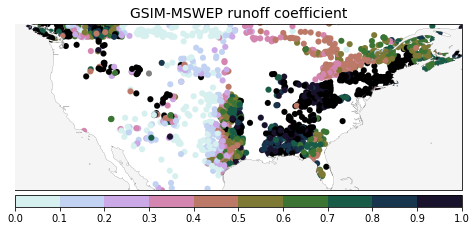

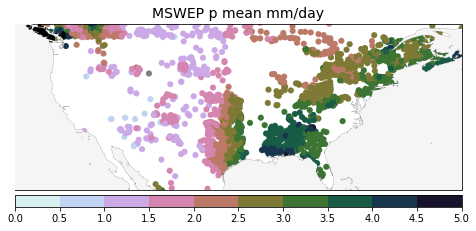

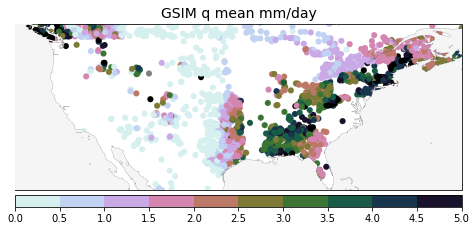

In [18]:
data_sources1 = 'mswep-p_gleam-ep_gswp-t' 
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources1}.csv',index_col=0)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,1,11)
bounds2 = np.linspace(0,1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean']/df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='rc', size=10)
ax.set_title(f'GSIM-MSWEP runoff coefficient',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['p_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='p', size=10)
ax.set_title(f'MSWEP p mean mm/day',size=14)

cmap_vd2 = cmap_rdbu   
bounds = np.linspace(0,5,11)
bounds2 = np.linspace(0,5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(df.lon,df.lat,c=df['q_mean'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(label='q', size=10)
ax.set_title(f'GSIM q mean mm/day',size=14)

## US GSIM CATCHMENTS

In [19]:
# GSIM DATA
g1 = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_metadata.csv',index_col=0)
g2 = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_catchment_characteristics.csv',index_col=0)
g = pd.concat([g1,g2],axis=1)
g['gsim.no'] = g.index
g.index = g['reference.no']
g = g.drop(columns=['slt.q2', 'slt.q3', 'slt.max', 'soil.type', 'tp.mean', 'tp.min',
       'tp.q1', 'tp.q2', 'tp.q3', 'tp.max','climate.type', 'no.dams',
       'sto.volume', 'dr.mean', 'dr.min', 'dr.q1', 'dr.q2', 'dr.q3', 'dr.max',
       'ele.mean', 'ele.min', 'ele.q1', 'ele.q2', 'ele.q3', 'ele.max',
       'ir.mean', 'ir.min', 'ir.q1', 'ir.q2', 'ir.q3', 'ir.max',
       'landcover.type', 'lithology.type', 'nl.mean', 'nl.min', 'nl.q1',
       'nl.q2', 'nl.q3', 'nl.max', 'pop.count', 'pd.mean', 'pd.min', 'pd.q1',
       'pd.q2', 'pd.q3', 'pd.max', 'slp.mean', 'slp.min', 'slp.q1', 'slp.q2',
       'slp.q3', 'slp.max', 'sb.mean', 'sb.min', 'sb.q1', 'sb.q2', 'sb.q3',
       'sb.max', 'scl.mean', 'scl.min', 'scl.q1', 'scl.q2', 'scl.q3',
       'scl.max', 'snd.mean', 'snd.min', 'snd.q1', 'snd.q2', 'snd.q3',
       'snd.max', 'slt.mean', 'slt.min', 'slt.q1'])
g['area'] = g['area'].astype(float)
g[['area.meta', 'area.est']] = g[['area.meta', 'area.est']].astype(float)

# COMBINE GSIM DATA WITH CAMELS DATA
g = g[g['reference.db']=='usgs']
u = pd.read_csv(f'{work_dir}/output/us_attributes.csv',index_col=0)
u.index = u.index.astype(str)

m = pd.DataFrame(index=u.index,columns=['gsim_id','q_mean_c','p_mean_c','gauge_lat_c','gauge_lon_c','area1_c','area2_c',
                                        'area_g0','area_g1','area_g2','area_quality','gauge_lat_g0','gauge_lon_g0','gauge_lat_g1','gauge_lon_g1','gauge_lat_g2','gauge_lon_g2'])
for c in u.index:
    if (c in g.index):
        m.loc[c]['gsim_id'] = g.loc[c]['gsim.no']
        m.loc[c]['q_mean_c'] = u.loc[c].q_mean
        m.loc[c]['p_mean_c'] = u.loc[c].p_mean
        m.loc[c]['gauge_lat_c'] = u.loc[c]['gauge_lat']
        m.loc[c]['gauge_lon_c'] = u.loc[c]['gauge_lon']
        m.loc[c]['area1_c'] = u.loc[c]['area_gages2']
        m.loc[c]['area2_c'] = u.loc[c]['area_geospa_fabric']
        m.loc[c]['gauge_lat_g0'] = g.loc[c]['latitude']
        m.loc[c]['gauge_lon_g0'] = g.loc[c]['longitude']
        m.loc[c]['gauge_lat_g1'] = g.loc[c]['lat.org']
        m.loc[c]['gauge_lon_g1'] = g.loc[c]['long.org']
        m.loc[c]['gauge_lat_g2'] = g.loc[c]['lat.new']
        m.loc[c]['gauge_lon_g2'] = g.loc[c]['long.new']
        m.loc[c]['area_g0'] = g.loc[c]['area']
        m.loc[c]['area_g1'] = g.loc[c]['area.meta']
        m.loc[c]['area_g2'] = g.loc[c]['area.est']
        m.loc[c]['area_quality'] = g.loc[c]['quality']
m[['q_mean_c','p_mean_c','gauge_lat_c','gauge_lon_c','area1_c','area2_c','area_g0','area_g1','area_g2','gauge_lat_g0','gauge_lon_g0','gauge_lat_g1','gauge_lon_g1','gauge_lat_g2','gauge_lon_g2']].astype(float)
m = m.dropna()

In [21]:
m

,gsim_id,q_mean_c,p_mean_c,gauge_lat_c,gauge_lon_c,area1_c,area2_c,area_g0,area_g1,area_g2,area_quality,gauge_lat_g0,gauge_lon_g0,gauge_lat_g1,gauge_lon_g1,gauge_lat_g2,gauge_lon_g2
gauge_id,,,,,,,,,,,,,,,,,
1013500,US_0000002,1.699155,3.126679,47.23739,-68.58264,2252.7,2303.95,873.0,2261.06,2238.599,High,47.2375,-68.582778,47.2375,-68.58278,47.2396,-68.5813
1022500,US_0000022,2.173062,3.608126,44.60797,-67.93524,573.6,620.38,227.0,587.9273,571.4272,High,44.608056,-67.935278,44.60806,-67.93528,44.6062,-67.9354
1030500,US_0000028,1.820108,3.274405,45.50097,-68.30596,3676.17,3676.09,1418.0,3672.603,3679.973,High,45.501111,-68.305833,45.50111,-68.30583,45.5021,-68.3063
1031500,US_0000031,2.030242,3.522957,45.17501,-69.3147,769.05,766.53,298.0,771.8165,760.1056,High,45.175,-69.314722,45.175,-69.31472,45.1729,-69.3146
1047000,US_0000049,2.18287,3.323146,44.8692,-69.9551,909.1,904.94,353.0,914.2658,917.3796,High,44.869167,-69.955,44.86917,-69.955,44.8687,-69.9563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411000,US_0008483,1.90886,3.406193,47.70611,-115.97917,867.48,866.1,335.0,867.646,853.7977,High,47.706111,-115.979167,47.70611,-115.9792,47.7062,-115.9771
13011500,US_0008571,1.627309,2.433982,43.85028,-110.51778,404.08,405.2,169.0,437.708,411.2096,Medium,43.850278,-110.517778,43.85028,-110.5178,43.8479,-110.5188
13011900,US_0008572,1.469536,2.383326,43.83806,-110.44111,851.8,848.0,323.0,836.5662,871.7169,High,43.838056,-110.440833,43.83806,-110.4408,43.8271,-110.4438


In [23]:
m.index

Index(['1013500', '1022500', '1030500', '1031500', '1047000', '1052500',
       '1054200', '1055000', '1057000', '1162500',
       ...
       '8380500', '9386900', '9430500', '9430600', '10396000', '12411000',
       '13011500', '13011900', '13023000', '13240000'],
      dtype='object', name='gauge_id', length=216)

In [225]:
# CATCHMENT AREA REPORTED IN TIMESERIES FILES
l = []
for i in range(len(m)):
    cid = m['gsim_id'][i]
    mid = m.index[i]
    filepath=(f'{work_dir}/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/{cid}.year')
    # save catchment meta data in dataframe
    b = pd.read_csv(filepath,delimiter=':',skiprows=10,nrows=7, index_col=0)
    c = pd.DataFrame(index=[0],columns=['gsim.no','river','station','country','lat_deg','lon_deg','alt_m','area_km2'])
    c['gsim.no'] = str.strip(b.columns[0])
    c['river'] = str.strip(b.iloc[0,0])
    c['station'] = str.strip(b.iloc[1,0])
    c['country'] = str.strip(b.iloc[2,0])
    c['lat_deg'] = str.strip(b.iloc[3,0])
    c['lon_deg'] = str.strip(b.iloc[4,0])
    c['alt_m'] = str.strip(b.iloc[5,0])
    c['area_km2'] = str.strip(b.iloc[6,0])
    c = c.replace('',np.nan)
    c['c_id'] = mid
    c[['lat_deg','lon_deg','alt_m','area_km2']] = c[['lat_deg','lon_deg','alt_m','area_km2']].astype(float)
    l.append(c)

In [226]:
g3 = pd.concat(l)
g3.index= g3.c_id
m['area_g3'] = g3['area_km2']
m

,gsim_id,q_mean_c,p_mean_c,gauge_lat_c,gauge_lon_c,area1_c,area2_c,area_g0,area_g1,area_g2,area_quality,gauge_lat_g0,gauge_lon_g0,gauge_lat_g1,gauge_lon_g1,gauge_lat_g2,gauge_lon_g2,area_g3
gauge_id,,,,,,,,,,,,,,,,,,
1013500,US_0000002,1.699155,3.126679,47.23739,-68.58264,2252.7,2303.95,873.0,2261.06,2238.599,High,47.2375,-68.582778,47.2375,-68.58278,47.2396,-68.5813,873.0
1022500,US_0000022,2.173062,3.608126,44.60797,-67.93524,573.6,620.38,227.0,587.9273,571.4272,High,44.608056,-67.935278,44.60806,-67.93528,44.6062,-67.9354,227.0
1030500,US_0000028,1.820108,3.274405,45.50097,-68.30596,3676.17,3676.09,1418.0,3672.603,3679.973,High,45.501111,-68.305833,45.50111,-68.30583,45.5021,-68.3063,1418.0
1031500,US_0000031,2.030242,3.522957,45.17501,-69.3147,769.05,766.53,298.0,771.8165,760.1056,High,45.175,-69.314722,45.175,-69.31472,45.1729,-69.3146,298.0
1047000,US_0000049,2.18287,3.323146,44.8692,-69.9551,909.1,904.94,353.0,914.2658,917.3796,High,44.869167,-69.955,44.86917,-69.955,44.8687,-69.9563,353.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411000,US_0008483,1.90886,3.406193,47.70611,-115.97917,867.48,866.1,335.0,867.646,853.7977,High,47.706111,-115.979167,47.70611,-115.9792,47.7062,-115.9771,335.0
13011500,US_0008571,1.627309,2.433982,43.85028,-110.51778,404.08,405.2,169.0,437.708,411.2096,Medium,43.850278,-110.517778,43.85028,-110.5178,43.8479,-110.5188,169.0
13011900,US_0008572,1.469536,2.383326,43.83806,-110.44111,851.8,848.0,323.0,836.5662,871.7169,High,43.838056,-110.440833,43.83806,-110.4408,43.8271,-110.4438,323.0


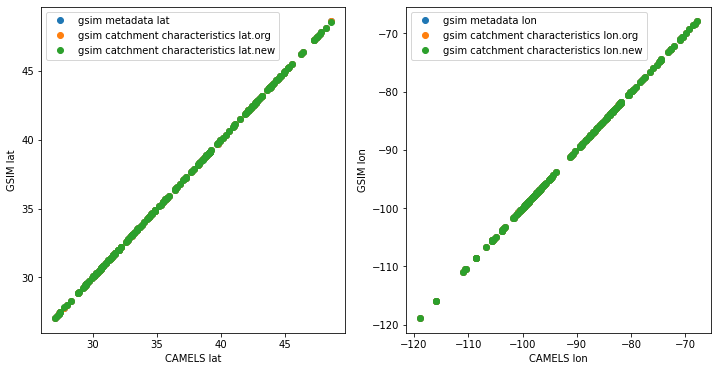

In [228]:
# plot lat and lon
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.plot(m.gauge_lat_c,m.gauge_lat_g0,'o',label='gsim metadata lat')
ax.plot(m.gauge_lat_c,m.gauge_lat_g1,'o',label='gsim catchment characteristics lat.org')
ax.plot(m.gauge_lat_c,m.gauge_lat_g2,'o',label='gsim catchment characteristics lat.new')
ax.set_xlabel('CAMELS lat')
ax.set_ylabel('GSIM lat')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(m.gauge_lon_c,m.gauge_lon_g0,'o',label='gsim metadata lon')
ax.plot(m.gauge_lon_c,m.gauge_lon_g1,'o',label='gsim catchment characteristics lon.org')
ax.plot(m.gauge_lon_c,m.gauge_lon_g2,'o',label='gsim catchment characteristics lon.new')
ax.set_xlabel('CAMELS lon')
ax.set_ylabel('GSIM lon')
ax.legend()

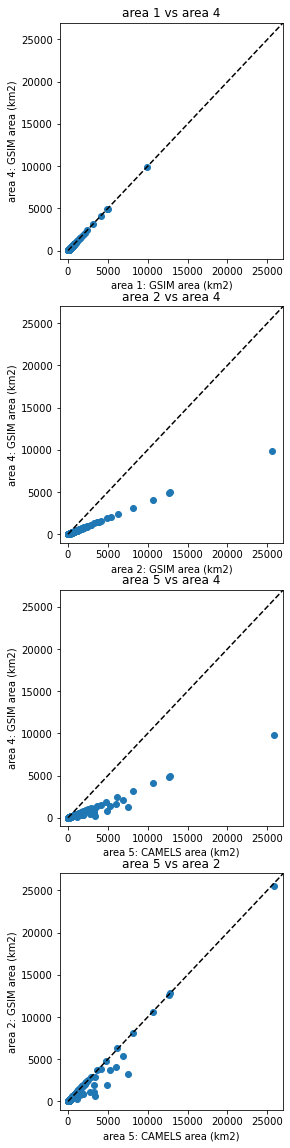

In [243]:
fig = plt.figure(figsize=(4,20))
ax = fig.add_subplot(411)
ax.plot(m.area_g0,m.area_g3,'o')
ax.set_xlabel('area 1: GSIM area (km2)')
ax.set_ylabel('area 4: GSIM area (km2)')
ax.set_title('area 1 vs area 4')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlim(-1000,27000)
ax.set_ylim(-1000,27000)

ax = fig.add_subplot(412)
ax.plot(m.area_g1,m.area_g3,'o')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlabel('area 2: GSIM area (km2)')
ax.set_ylabel('area 4: GSIM area (km2)')
ax.set_title('area 2 vs area 4')
ax.set_xlim(-1000,27000)
ax.set_ylim(-1000,27000)

ax = fig.add_subplot(413)
ax.plot(m.area1_c,m.area_g3,'o')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlabel('area 5: CAMELS area (km2)')
ax.set_ylabel('area 4: GSIM area (km2)')
ax.set_title('area 5 vs area 4')
ax.set_xlim(-1000,27000)
ax.set_ylim(-1000,27000)

ax = fig.add_subplot(414)
ax.plot(m.area1_c,m.area_g1,'o')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlabel('area 5: CAMELS area (km2)')
ax.set_ylabel('area 2: GSIM area (km2)')
ax.set_title('area 5 vs area 2')
ax.set_xlim(-1000,27000)
ax.set_ylim(-1000,27000)
fig.savefig(f'{work_dir}/output/us_area/area_scatter_vs_camels2.jpg',bbox_inches='tight',dpi=300)

Text(0.5, 1.0, '(Area2 - Area5)/Area5 (%)')

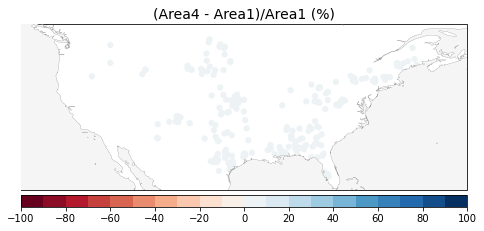

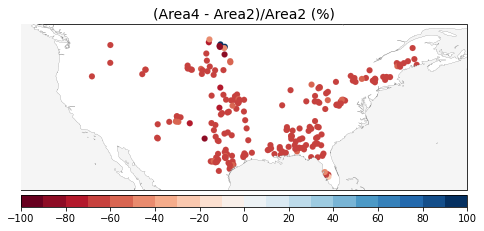

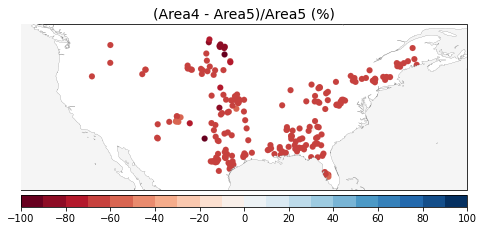

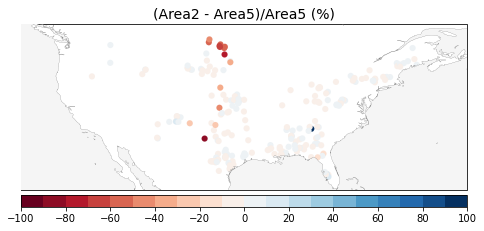

In [248]:
# map differences
cmap_vd2 = cm.get_cmap('RdBu')
bounds = np.linspace(-100,100,21)
bounds2 = np.linspace(-100,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

md = (m.area_g3-m.area_g0)/m.area_g0 * 100

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(m.gauge_lon_c,m.gauge_lat_c,c=md,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
ax.set_title(f'(Area4 - Area1)/Area1 (%)',size=14)

md = (m.area_g3-m.area_g2)/m.area_g2 * 100

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(m.gauge_lon_c,m.gauge_lat_c,c=md,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
ax.set_title(f'(Area4 - Area2)/Area2 (%)',size=14)

md = (m.area_g3-m.area1_c)/m.area1_c * 100

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(m.gauge_lon_c,m.gauge_lat_c,c=md,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
ax.set_title(f'(Area4 - Area5)/Area5 (%)',size=14)

md = (m.area_g1-m.area1_c)/m.area1_c * 100

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(m.gauge_lon_c,m.gauge_lat_c,c=md,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
ax.set_title(f'(Area2 - Area5)/Area5 (%)',size=14)



## ALL GSIM CATCHMENTS

In [219]:
# GSIM DATA
data_sources1 = 'gswp-p_gleam-ep_gswp-t' 
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources1}.csv',index_col=0)

g1 = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_metadata.csv',index_col=0)
g2 = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_catchment_characteristics.csv',index_col=0)
g = pd.concat([g1,g2],axis=1)
g.index = list(map(lambda x: x.lower(), g.index.values.tolist()))
g['g_id'] = list(map(lambda x: x.lower(), g.index.values.tolist()))
g = g.drop(columns=['slt.q2', 'slt.q3', 'slt.max', 'soil.type', 'tp.mean', 'tp.min',
       'tp.q1', 'tp.q2', 'tp.q3', 'tp.max','climate.type', 'no.dams',
       'sto.volume', 'dr.mean', 'dr.min', 'dr.q1', 'dr.q2', 'dr.q3', 'dr.max',
       'ele.mean', 'ele.min', 'ele.q1', 'ele.q2', 'ele.q3', 'ele.max',
       'ir.mean', 'ir.min', 'ir.q1', 'ir.q2', 'ir.q3', 'ir.max',
       'landcover.type', 'lithology.type', 'nl.mean', 'nl.min', 'nl.q1',
       'nl.q2', 'nl.q3', 'nl.max', 'pop.count', 'pd.mean', 'pd.min', 'pd.q1',
       'pd.q2', 'pd.q3', 'pd.max', 'slp.mean', 'slp.min', 'slp.q1', 'slp.q2',
       'slp.q3', 'slp.max', 'sb.mean', 'sb.min', 'sb.q1', 'sb.q2', 'sb.q3',
       'sb.max', 'scl.mean', 'scl.min', 'scl.q1', 'scl.q2', 'scl.q3',
       'scl.max', 'snd.mean', 'snd.min', 'snd.q1', 'snd.q2', 'snd.q3',
       'snd.max', 'slt.mean', 'slt.min', 'slt.q1','river.dist', 'station.dist', 'latlon.dist',
       'bin.latlon.dist', 'mean.dist', 'number.overlap',
       'number.available.days', 'number.missing.days', 'frac.missing.days',
       'year.start', 'year.end', 'year.no','altitude.meta', 'altitude.dem','grdb.merge', 'grdb.no', 'paired.db',
       'paired.db.no', 'river', 'station', 'country','dist.km','unit'])
g['area'] = g['area'].astype(float)
g[['area.meta', 'area.est']] = g[['area.meta', 'area.est']].astype(float)

In [220]:
g.head()

,reference.db,reference.no,latitude,longitude,altitude,area,long.org,lat.org,long.new,lat.new,area.meta,area.est,quality,g_id
af_0000001,grdb,2217100,36.9833,68.3000,320.0,37100.0,68.3000,36.9833,68.2979,36.9854,37100.0,36956.9777,High,af_0000001
af_0000002,grdb,2217101,36.7000,68.8333,401.0,24820.0,68.8333,36.7000,68.8271,36.7021,24820.0,23392.2953,Medium,af_0000002
af_0000003,grdb,2217102,36.1000,68.6667,562.0,19740.0,68.6667,36.1000,68.6646,36.1062,19740.0,19476.9207,High,af_0000003
af_0000004,grdb,2217103,35.6000,68.6000,899.0,12610.0,68.6000,35.6000,68.6062,35.5979,12610.0,12457.6447,High,af_0000004
af_0000005,grdb,2217104,35.3000,67.9167,1588.0,3795.0,67.9167,35.3000,67.9146,35.3021,3795.0,3684.0183,High,af_0000005


In [ ]:
# CATCHMENT AREA REPORTED IN TIMESERIES FILES
l = []
for i in range(len(df)):
    if (df.index[i] in g.index):
        a = df.loc[df.index[i],'area']
        k = g.loc[df.index[i]]
        k = pd.DataFrame(k)
        k = k.transpose()
        filepath=(f'{work_dir}/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/{k.index[0].upper()}.year')
        # save catchment meta data in dataframe
        b = pd.read_csv(filepath,delimiter=':',skiprows=10,nrows=7, index_col=0)
        c = pd.DataFrame(index=[0],columns=['gsim.no','lat_deg','lon_deg','alt_m','area_km2'])
        c['gsim.no'] = str.strip(b.columns[0])
        # c['river'] = str.strip(b.iloc[0,0])
        # c['station'] = str.strip(b.iloc[1,0])
        # c['country'] = str.strip(b.iloc[2,0])
        c['lat_deg'] = str.strip(b.iloc[3,0])
        c['lon_deg'] = str.strip(b.iloc[4,0])
        c['alt_m'] = str.strip(b.iloc[5,0])
        c['area_km2'] = str.strip(b.iloc[6,0])
        c = c.replace('',np.nan)
        # c['c_id'] = mid
        c[['lat_deg','lon_deg','alt_m','area_km2']] = c[['lat_deg','lon_deg','alt_m','area_km2']].astype(float)
        c['area_df'] = a
        c.index = [k.index[0]]
        p = pd.concat([k,c],axis=1)
        l.append(p)
co = pd.concat(l)
co.to_csv(f'{work_dir}/output/us_area/area_check_catchments.csv')

In [250]:
co = pd.read_csv(f'{work_dir}/output/us_area/area_check_catchments.csv',index_col=0)
coa = co.rename(columns={'area':'area1','area.meta':'area2','area.est':'area3','area_km2':'area4','area_df':'area5'})
# coa = coa[['area1','area2','area3','area4','area5','quality','latitude','longitude']]
# area1: area from metadata table
# area2: area 'area.meta' from catchment characteristics table
# area3: area 'area.est' from catchment characteristics table
# area4: area from timeseries file .year
# area5: area reported in catchment characteristics dataframe
# in principe is area4=area2=area1
coa['area4-area3'] = coa.area4-coa.area3
coa['r_area4-area3'] = (coa.area4-coa.area3)/coa.area3 * 100

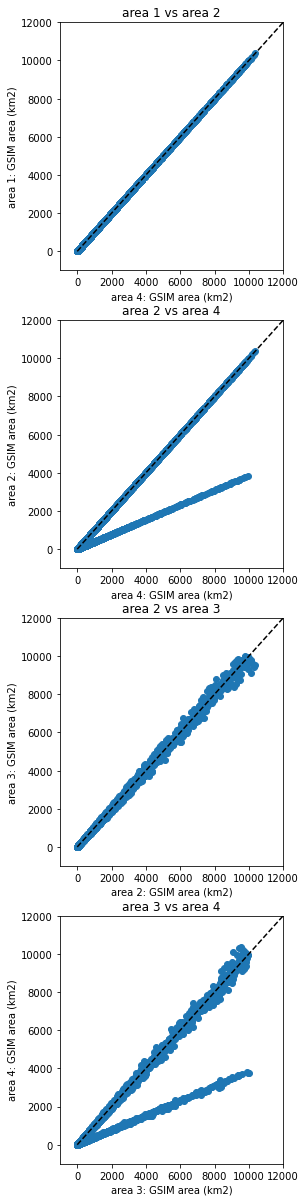

In [255]:
fig = plt.figure(figsize=(4,21))
ax = fig.add_subplot(411)
ax.plot(coa.area1,coa.area4,'o')
ax.set_xlabel('area 4: GSIM area (km2)')
ax.set_ylabel('area 1: GSIM area (km2)')
ax.set_title('area 1 vs area 2')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlim(-1000,12000)
ax.set_ylim(-1000,12000)

ax = fig.add_subplot(412)
ax.plot(coa.area2,coa.area4,'o')
ax.set_xlabel('area 4: GSIM area (km2)')
ax.set_ylabel('area 2: GSIM area (km2)')
ax.set_title('area 2 vs area 4')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlim(-1000,12000)
ax.set_ylim(-1000,12000)

ax = fig.add_subplot(413)
ax.plot(coa.area2,coa.area3,'o')
ax.set_xlabel('area 2: GSIM area (km2)')
ax.set_ylabel('area 3: GSIM area (km2)')
ax.set_title('area 2 vs area 3')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlim(-1000,12000)
ax.set_ylim(-1000,12000)

ax = fig.add_subplot(414)
ax.plot(coa.area3,coa.area4,'o')
ax.set_xlabel('area 3: GSIM area (km2)')
ax.set_ylabel('area 4: GSIM area (km2)')
ax.set_title('area 3 vs area 4')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlim(-1000,12000)
ax.set_ylim(-1000,12000)
fig.savefig(f'{work_dir}/output/us_area/area_scatter.jpg',bbox_inches='tight',dpi=300)

(-1000.0, 12000.0)

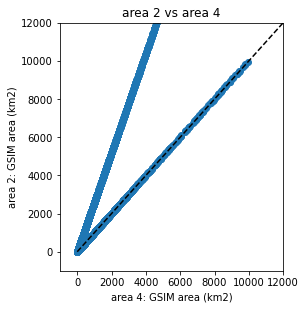

In [262]:
fig = plt.figure(figsize=(4,21))
ax = fig.add_subplot(411)
ax.plot(coa.area2,coa.area4*2.6,'o')
ax.set_xlabel('area 4: GSIM area (km2)')
ax.set_ylabel('area 2: GSIM area (km2)')
ax.set_title('area 2 vs area 4')
ax.plot([0,30000],[0,30000],'k--')
ax.set_xlim(-1000,12000)
ax.set_ylim(-1000,12000)

Text(0.5, 1.0, '(Area3 - Area4)/Area5 (%)')

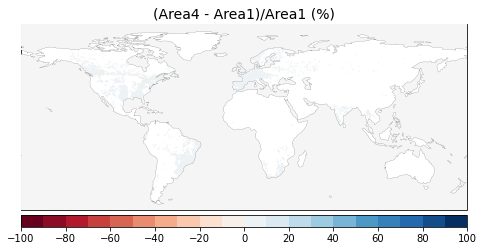

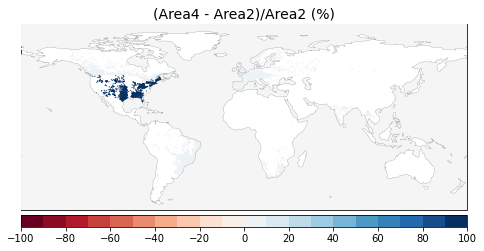

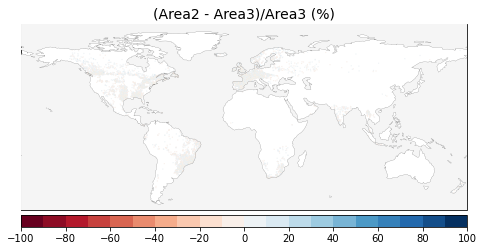

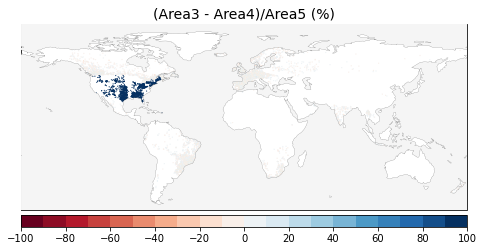

In [264]:
# map differences
lat_min,lat_max = -60,90
lon_min,lon_max = -180,180

cmap_vd2 = cm.get_cmap('RdBu')
bounds = np.linspace(-100,100,21)
bounds2 = np.linspace(-100,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

md = (coa.area1-coa.area4)/coa.area4 * 100

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(coa.longitude,coa.latitude,c=md,s=1,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
ax.set_title(f'(Area4 - Area1)/Area1 (%)',size=14)

md = (coa.area2-coa.area4)/coa.area4 * 100

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(coa.longitude,coa.latitude,c=md,s=1,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
ax.set_title(f'(Area4 - Area2)/Area2 (%)',size=14)

md = (coa.area2-coa.area3)/coa.area3 * 100

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(coa.longitude,coa.latitude,c=md,s=1,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
ax.set_title(f'(Area2 - Area3)/Area3 (%)',size=14)

md = (coa.area3-coa.area4)/coa.area4 * 100

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(coa.longitude,coa.latitude,c=md,s=1,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.012,aspect=38, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
ax.set_title(f'(Area3 - Area4)/Area5 (%)',size=14)



In [359]:
#updated area - area6
area = pd.read_csv(f'{work_dir}/output/catchment_area.csv',index_col=0)
coa['area6'] = area.area
coa[['area1','area2','area3','area4','area5','area6']]

,area1,area2,area3,area4,area5,area6
dk_0000028,563.000000,563.0000,561.1209,563.000000,561.1209,561.1209
ca_0002351,1235.699951,1235.7000,1176.4190,1235.699951,1176.4190,1176.4190
sk_0000020,40.180000,40.1800,40.0022,40.180000,40.0022,40.0022
br_0001524,4920.000000,4920.0000,4857.6820,4920.000000,4857.6820,4857.6820
cz_0000019,1559.000000,1559.0000,1565.3840,1559.000000,1565.3840,1565.3840
...,...,...,...,...,...,...
us_0000014,228.300000,591.2943,608.4460,228.300000,608.4460,591.2943
gb_0000200,251.200000,251.2000,245.5303,251.200000,245.5303,245.5303
us_0000549,774.000000,2004.6510,2067.8230,774.000000,2067.8230,2004.6510
us_0000016,92.900000,240.6099,241.9605,92.900000,241.9605,240.6099


## RECALCULATE Q FOR US CATCHMENTS

In [357]:
# update area.csv
area = pd.read_csv(f'{work_dir}/output/catchment_area.csv',index_col=0)

#recalculate us catchments:
l=[]
for ix in area.index:
    if ('us' in ix):
        l.append(ix)
        
ar = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_catchment_characteristics.csv',index_col=0)
ar.index = list(map(lambda x: x.lower(), ar.index.values.tolist()))
ar = ar['area.meta']

area.loc[l,'area'] = ar
area.to_csv(f'{work_dir}/output/catchment_area.csv')

In [331]:
# process us discharge
def preprocess_gsim_discharge(catch_id,work_dir):
    ar = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_catchment_characteristics.csv',index_col=0)
    cid_l = catch_id
    cid_u = catch_id.upper()
    filepath=(f'{work_dir}/data/GSIM_data/GSIM_indices/TIMESERIES/yearly/{cid_u}.year')
    
    # area
    area = ar.loc[cid_u,'area.meta']
    
    # save catchment meta data in dataframe
    b = pd.read_csv(filepath,delimiter=':',skiprows=10,nrows=7, index_col=0)
    c = pd.DataFrame(index=[0],columns=['gsim.no','lat_deg','lon_deg','alt_m','area_km2'])
    c['gsim.no'] = str.strip(b.columns[0])
    c['river'] = str.strip(b.iloc[0,0])
    c['station'] = str.strip(b.iloc[1,0])
    c['country'] = str.strip(b.iloc[2,0])
    c['lat_deg'] = str.strip(b.iloc[3,0])
    c['lon_deg'] = str.strip(b.iloc[4,0])
    c['alt_m'] = str.strip(b.iloc[5,0])
    c['area_km2'] = area
    c = c.replace('',np.nan)
    c[['lat_deg','lon_deg','alt_m','area_km2']] = c[['lat_deg','lon_deg','alt_m','area_km2']].astype(float)
    
    # make dataframe with catchment timeseries
    a = pd.read_csv(filepath, skiprows=21, delimiter=',',index_col=0)
    a.index = pd.to_datetime(a.index)
    a.columns = a.columns.str.strip() # remove \t (=tab))    
    a = a.drop(columns=['"GINI"','"CV"','"CT"','"P10"', '"P20"', '"P30"', '"P40"', '"P50"', '"P60"', '"P70"', '"P80"', '"P90"']) # drop columns we don't need
    a = a.astype(str)

    # remove all tabs
    for i in range(len(a)): #loop over rows
        for j in range(len(a.iloc[0])): # loop over columns
            a.iloc[i,j] = a.iloc[i,j].strip()

    a = a.replace('NA',np.nan) # replace NA with np.nan

    #rename columns
    a = a.rename(columns={'"MEAN"': 'mean_m3s', '"SD"': 'sd_m3s', '"IQR"': 'iqr_m3s', '"MIN"': 'min_m3s', '"MAX"': 'max_m3s',
            '"MIN7"': 'min7_m3s', '"MAX7"': 'max7_m3s', '"DOYMIN"':'doymin','"DOYMAX"':'doymax', '"DOYMIN7"':'doy7min', '"DOYMAX7"':'doy7max',
            '"n.missing"':'nr_mis_days','"n.available"':'nr_av_days'})
    a = a.astype(float)

    #convert values to mm/day using the catchment area saved in dataframe c
    area_m2 = c.area_km2.values[0] * (10**6) #convert km2 to m2
    a_mm = a
    a_mm = a_mm.rename(columns={'mean_m3s':'mean_mmd', 'sd_m3s':'sd_mmd', 'iqr_m3s':'iqr_mmd', 'min_m3s':'min_mmd', 'max_m3s':'max_mmd', 'min7_m3s':'min7_mmd','max7_m3s':'max7_mmd'})
    a_mm[['mean_mmd', 'sd_mmd', 'iqr_mmd', 'min_mmd', 'max_mmd', 'min7_mmd','max7_mmd']] = a[['mean_m3s', 'sd_m3s', 'iqr_m3s', 'min_m3s', 'max_m3s', 'min7_m3s','max7_m3s']] * (1/area_m2) * 1000 * 86400
    a_mm = a_mm.rename(columns={'mean_m3s':'mean_mmd', 'sd_m3s':'sd_mmd', 'iqr_m3s':'iqr_mmd', 'min_m3s':'min_mmd', 'max_m3s':'max_mmd', 'min7_m3s':'min7_mmd','max7_m3s':'max7_mmd'})
    a_mm = a_mm.astype(float)
    a_mm = a_mm.rename(columns={'mean_mmd':'Q'})

    # add length of timeseries to dataframe c
    c['start_year'] = a_mm.index[0]
    c['end_year'] = a_mm.index[-1]
    c['length_ts_yr'] = int((a_mm.index[0] - a_mm.index[-1]).days / -365)
    c['start_year'] = pd.to_datetime(c['start_year'])
    c['end_year'] = pd.to_datetime(c['end_year'])
            
    # save to 
    c.to_csv(str(work_dir)+'/output/gsim/characteristics/'+str(catch_id)+'.csv')
    # a.to_csv(str(folder)+'/data/GSIM_data/processed_us/catchment_yearly/m3_s/'+str(catch_id)+'.csv')
    a_mm.to_csv(str(work_dir)+'/output/gsim/timeseries/'+str(catch_id)+'.csv')

In [332]:
def run_function_parallel(
    catch_list=list,
    work_dir_list=list,
    # threads=None
    threads=100
):
    """
    Runs function preprocess_gsim_discharge  in parallel.

    catch_list:  str, list, list of catchmet ids
    fol_in_list:     str, list, list of input folders
    fol_out_list:   str, list, list of output folders
    threads:         int,       number of threads (cores), when set to None use all available threads

    Returns: None
    """
    # Set number of threads (cores) used for parallel run and map threads
    if threads is None:
        pool = Pool()
    else:
        pool = Pool(nodes=threads)
    # Run parallel models
    results = pool.map(
        preprocess_gsim_discharge,
        catch_list,
        work_dir_list,
    )

In [337]:
area = pd.read_csv(f'{work_dir}/output/catchment_area.csv',index_col=0)
area = area.sort_index()
area_us = area[6921:8511]
catch_list = area_us.index[1000:]
work_dir_list = [work_dir]*len(catch_list)
run_function_parallel(catch_list,work_dir_list)

In [354]:
def select_catchments(work_dir,catch_id):
    # load df with all catchments with characteristics
    df = pd.read_csv(f'{work_dir}/data/GSIM_data/GSIM_metadata/GSIM_catalog/GSIM_catchment_characteristics.csv',index_col=0) 
    
    # load catchment characteristic file
    a = pd.read_csv(f'{work_dir}/output/gsim/characteristics/{catch_id}.csv',index_col=0)
    a['start_year'] = pd.to_datetime(a['start_year'])
    a['end_year'] = pd.to_datetime(a['end_year'])
    k = a['gsim.no'][0]   

    # check if end year later than 1980
    t_1980 = a['end_year'][0]> datetime(year=1980,month=1,day=1)

    # check timeseries
    b = pd.read_csv(f'{work_dir}/output/gsim/timeseries/{catch_id}.csv',index_col=0)

    # later than 1980
    b = b.loc['1980-12-31':]

    # set to nan if nr available days <250
    b.Q[b['nr_av_days']<250] = np.nan

    # drop nan years
    b = b.dropna(axis=0)

    # check length of timeseries
    len_b = len(b)

    # >10 years data
    t_length = len_b>10

    # area quality
    a_qual = (df.loc[k]['quality']=='High') or (df.loc[k]['quality']=='Medium')

    # if three criteria are met -> save catchment timeseries in timeseries_selected
    if (t_length) & (a_qual) & (t_1980):
        b.to_csv(f'{work_dir}/output/q_timeseries_selected/{catch_id}.csv')
        
def run_function2_parallel(
    work_dir_list=list,
    catch_list=list,
    # threads=None
    threads=100
):
    """
    Runs function select_catchments in parallel.

    data_dir_list: str, list, list of data dirs
    out_dir_list: str, list, list of output directories
    catch_list: str, list, list of catchment ids
    threads:         int,       number of threads (cores), when set to None use all available threads

    Returns: None
    """
    # Set number of threads (cores) used for parallel run and map threads
    if threads is None:
        pool = Pool()
    else:
        pool = Pool(nodes=threads)
    # Run parallel models
    results = pool.map(
        select_catchments,
        work_dir_list,
        catch_list,
    )

In [356]:
area = pd.read_csv(f'{work_dir}/output/catchment_area.csv',index_col=0)
area = area.sort_index()
area_us = area[6921:8511]
catch_list = area_us.index[10:]
work_dir_list = [work_dir]*len(catch_list)
run_function2_parallel(work_dir_list,catch_list)